# Load libraries

In [1]:
import os
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras import *

# image processing
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import img_to_array

# build your own nets
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [3]:
train_image_files_path = "/keras2production/fruits/Training/"
valid_image_files_path = "/keras2production/fruits/Test/"

# Keras

https://keras.io/

- try out different fruits and combinations of fruits to classify

- play around with different data augmentation settings

- try out different layer combinations
- try out different hyperparameter settings
- train the model

- download new images
- use them to predict based on your trained model

- Train another model with 20% validation split of the training data (Hint: ImageDataGenerator & flow_from_directory)
- Use `evaluate_generator` and `predict_generator` to measure performance of your model on the Test data folder

In [14]:
fruit_list = ["Apricot", "Avocado", "Banana", "Clementine", "Cocos", "Kiwi", "Lemon", "Limes", 
              "Mandarine", "Orange", "Peach", "Pineapple", "Plum", "Pomegranate", "Raspberry", "Strawberry"]
output_n = len(fruit_list)
size = 20
img_width = 20
img_height = 20
channels = 3
batch_size = 32

In [15]:
train_data_gen = ImageDataGenerator(
    rescale = 1 / 255 #,
    
    # optional data augmentation
    #rotation_range = 40,
    #rwidth_shift_range = 0.2,
    #rheight_shift_range = 0.2,
    #rshear_range = 0.2,
    #rzoom_range = 0.2,
    #rhorizontal_flip = TRUE,
    #rfill_mode = "nearest"
)

valid_data_gen = ImageDataGenerator(
    # validation data shouldn't be augmented
    rescale = 1 / 255
)

train_image_array_gen = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size = (img_width, img_height),
    class_mode = 'categorical',
    classes = fruit_list,
    color_mode = 'rgb', 
    batch_size = batch_size,
    seed = 42)

valid_image_array_gen = valid_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size = (img_width, img_height),
    class_mode = 'categorical',
    classes = fruit_list,
    color_mode = 'rgb', 
    batch_size = batch_size,
    seed = 42)

Found 7709 images belonging to 16 classes.
Found 2428 images belonging to 16 classes.


In [16]:
epochs = 3
train_samples = train_image_array_gen.n
valid_samples = valid_image_array_gen.n
print(train_samples, valid_samples)

7709 2428


In [26]:
model = Sequential()

# first hidden layer
model.add(Conv2D(32, (3, 3), padding = "same", input_shape = (img_width, img_height, channels)))
model.add(Activation('relu'))

# second hidden layer
model.add(Conv2D(16, (3, 3), padding = "same"))
model.add(LeakyReLU(alpha = 0.5))
model.add(BatchNormalization())

# max pooling
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# Flatten max filtered output into feature vector 
# and feed into dense layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Outputs from dense layer are projected onto output layer
model.add(Dense(output_n))
model.add(Activation('softmax'))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 20, 20, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 20, 20, 16)        4624      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 20, 20, 16)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 20, 20, 16)        64        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 10, 10, 16)        0         
__________

In [30]:
model = Sequential()

# first hidden layer
model.add(Conv2D(64, (3, 3), padding = "same", input_shape = (img_width, img_height, channels)))
model.add(Activation('relu'))

# second hidden layer
model.add(Conv2D(32, (3, 3), padding = "same"))
model.add(LeakyReLU(alpha = 0.5))
model.add(BatchNormalization())

# max pooling
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))


# second hidden layer
model.add(Conv2D(16, (3, 3), padding = "same"))
model.add(LeakyReLU(alpha = 0.5))
model.add(BatchNormalization())

# Flatten max filtered output into feature vector 
# and feed into dense layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Outputs from dense layer are projected onto output layer
model.add(Dense(output_n))
model.add(Activation('softmax'))

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 20, 20, 64)        1792      
_________________________________________________________________
activation_19 (Activation)   (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 20, 20, 32)        18464     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 20, 20, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 20, 20, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 10, 10, 32)        0         
__________

In [32]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = RMSprop(lr = 0.0001, decay = 1e-6),
              metrics = ['accuracy'])


In [33]:
history = model.fit_generator(
    train_image_array_gen,
    steps_per_epoch = int(train_samples / batch_size), 
    epochs = epochs, 
    validation_data = valid_image_array_gen,
    validation_steps = int(valid_samples / batch_size),
    verbose = 1
)

Epoch 1/3
240/240 [==============================] - 17s 72ms/step - loss: 0.0731 - acc: 0.9751 - val_loss: 0.0078 - val_acc: 0.9990
Epoch 2/3
240/240 [==============================] - 16s 69ms/step - loss: 0.0083 - acc: 0.9976 - val_loss: 0.0023 - val_acc: 0.9996
Epoch 3/3
240/240 [==============================] - 16s 69ms/step - loss: 0.0027 - acc: 0.9991 - val_loss: 9.3770e-04 - val_acc: 0.9997


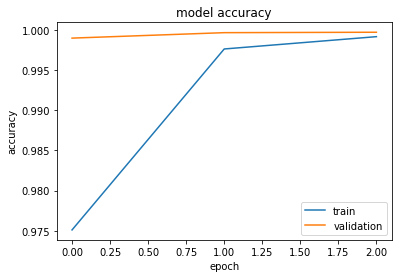

In [34]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'lower right')
plt.show()

In [38]:
classes = train_image_array_gen.class_indices
classes

{'Apricot': 0,
 'Avocado': 1,
 'Banana': 2,
 'Clementine': 3,
 'Cocos': 4,
 'Kiwi': 5,
 'Lemon': 6,
 'Limes': 7,
 'Mandarine': 8,
 'Orange': 9,
 'Peach': 10,
 'Pineapple': 11,
 'Plum': 12,
 'Pomegranate': 13,
 'Raspberry': 14,
 'Strawberry': 15}

In [81]:
def classify_image(im_path):
    image = cv2.imread(im_path)
    b,g,r = cv2.split(image)
    image = cv2.merge([r,b,g])
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    image = image_utils.load_img(im_path,target_size=(img_width, img_height))
    image = image_utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = image/255
    
    prediction = model.predict(image)
    top_3 = list((-prediction[0]).argsort()[:3])
    
    out = dict()
    prob = dict()
    
    for i in top_3:
        for k,v in classes.items():
            if v==i:
                out[i]=k
                prob[i]=prediction[0][i]
    print(out)
    print(prob)
                
                                 
                                 

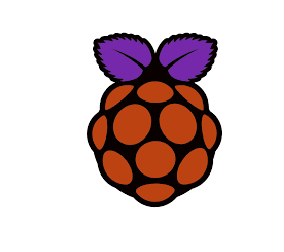

{15: 'Strawberry', 11: 'Pineapple', 1: 'Avocado'}
{15: 0.9753862, 11: 0.02428953, 1: 0.00031816887}


In [82]:
classify_image('/keras2production/notebooks/1-deeplearning/test_images/raspberry.jpg')